<a href="https://colab.research.google.com/github/RahmathVH/Data-Science/blob/main/ML_Classification_Model_Road_Traffic_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ROAD TRAFFIC ACCIDENT SEVERITY CLASSIFIER:**

*   This data set is collected from Addis Ababa Sub city police departments for Masters research work. 
*  The data set has been prepared from manual records of road traffic accident of the year 2017-20. All the sensitive information have been excluded during data encoding and finally it has 32 features and 12316 instances of the accident.






**OBJECTIVE:**

*   This machine learning model predict accident severity using different classification algorithms and findout the one with maximum accuracy




In [ ]:
#LOADING LIBRARIES AND DATA:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("/content/RTA Dataset.csv")
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [ ]:
df.shape

(12316, 32)

In [ ]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
#dropping columns which has more than 2500 missing values and Time column:
df.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality','Fitness_of_casuality','Time'],axis=1,inplace=True)
df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,Undivided Two way,...,2,1,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,Two-way (divided with broken lines road marking),...,2,1,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,Two-way (divided with broken lines road marking),...,1,1,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,Undivided Two way,...,2,1,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


**EDA:Exploratory data analysis**

In [ ]:
#Distribution of accident severity:
df['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

Text(0.5, 1.0, 'Distribution of Accident_severity')

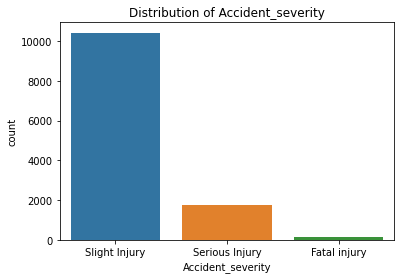

In [ ]:
#Plotting
sns.countplot(x=df['Accident_severity'])
plt.title("Distribution of Accident_severity")

**HANDLING MISSING VALUES:**

In [ ]:
df.isna().sum()

Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [ ]:
#Storing categerical columns to a varibale:
categorical=[i for i in df.columns if df[i].dtype=='O']
print("Categorical_val",categorical)

Categorical_val ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [ ]:
#For categorical values we can replace null==>mode
for i in categorical:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [ ]:
df.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [ ]:
df.dtypes

Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_severity              object
Pedestrian_movement            object
Cause_of_accident              object
Accident_sev

In [ ]:
#since there are so many categorical values,we need feature selection(to remove unwanted columns)
#We need to perform label encoding before applying chi 2(chi square analysis) analysis:

In [ ]:
#label encoding:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#create a new dataframe to perform chi 2 analysis:
df1=pd.DataFrame()

#encoding all the categorical column except the o/p column:
for i in categorical:
  if i!="Accident_severity":
    df1[i]=le.fit_transform(df[i])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Day_of_week              12316 non-null  int64
 1   Age_band_of_driver       12316 non-null  int64
 2   Sex_of_driver            12316 non-null  int64
 3   Educational_level        12316 non-null  int64
 4   Vehicle_driver_relation  12316 non-null  int64
 5   Driving_experience       12316 non-null  int64
 6   Type_of_vehicle          12316 non-null  int64
 7   Owner_of_vehicle         12316 non-null  int64
 8   Area_accident_occured    12316 non-null  int64
 9   Lanes_or_Medians         12316 non-null  int64
 10  Road_allignment          12316 non-null  int64
 11  Types_of_Junction        12316 non-null  int64
 12  Road_surface_type        12316 non-null  int64
 13  Road_surface_conditions  12316 non-null  int64
 14  Light_conditions         12316 non-null  int64
 15  We

In [ ]:
df1.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
0,1,0,1,0,0,0,0,3,9,2,...,3,2,3,2,3,2,5,3,5,9
1,1,1,1,4,0,3,11,3,6,4,...,3,2,8,2,3,2,5,3,5,16
2,1,0,1,4,0,0,5,3,1,6,...,3,2,2,2,0,1,1,2,5,0
3,3,0,1,4,0,2,11,0,6,6,...,0,2,8,2,2,0,0,2,5,1
4,3,0,1,4,0,1,0,3,4,6,...,0,2,8,2,3,2,5,3,5,16


In [ ]:
#Import chi2 test:
from sklearn.feature_selection import chi2
f_p_values=chi2(df1,df['Accident_severity'])

In [ ]:
#f_p_values return fscore and pvalues:
f_p_values

(array([ 0.15822071,  8.91539214,  0.1431894 ,  0.17458477,  5.34534549,
         4.49967858,  1.07767124,  1.10426215,  3.61654037,  3.28161464,
         0.1319306 ,  3.08648691,  6.99480557,  0.61510308, 16.08282359,
         1.14934538, 10.09632283,  2.20071197,  3.2168602 ,  0.12594479,
        13.77841337,  0.20273788,  0.39747982,  3.19366551]),
 array([9.23937958e-01, 1.15890328e-02, 9.30908116e-01, 9.16409114e-01,
        6.90673790e-02, 1.05416165e-01, 5.83427189e-01, 5.75721597e-01,
        1.63937473e-01, 1.93823502e-01, 9.36163348e-01, 2.13686893e-01,
        3.02759144e-02, 7.35244973e-01, 3.21854237e-04, 5.62889079e-01,
        6.42112839e-03, 3.32752607e-01, 2.00201664e-01, 9.38969394e-01,
        1.01872169e-03, 9.03599597e-01, 8.19763078e-01, 2.02536988e-01]))

In [ ]:
#convert it to Df for better understanding:
f_p_values1=pd.DataFrame({'features':df1.columns,'Fscore':f_p_values[0],'Pvalues':f_p_values[1]})
f_p_values1

,features,Fscore,Pvalues
0,Day_of_week,0.158221,0.923938
1,Age_band_of_driver,8.915392,0.011589
2,Sex_of_driver,0.143189,0.930908
3,Educational_level,0.174585,0.916409
4,Vehicle_driver_relation,5.345345,0.069067
5,Driving_experience,4.499679,0.105416
6,Type_of_vehicle,1.077671,0.583427
7,Owner_of_vehicle,1.104262,0.575722
8,Area_accident_occured,3.616540,0.163937
9,Lanes_or_Medians,3.281615,0.193824


In [ ]:
#to get lower p values:sorted
f_p_values1.sort_values(by='Pvalues',ascending=True)

,features,Fscore,Pvalues
14,Light_conditions,16.082824,0.000322
20,Age_band_of_casualty,13.778413,0.001019
16,Type_of_collision,10.096323,0.006421
1,Age_band_of_driver,8.915392,0.011589
12,Road_surface_type,6.994806,0.030276
4,Vehicle_driver_relation,5.345345,0.069067
5,Driving_experience,4.499679,0.105416
8,Area_accident_occured,3.616540,0.163937
9,Lanes_or_Medians,3.281615,0.193824
18,Casualty_class,3.216860,0.200202


In [ ]:
#After evalauting we are removing lesser important cloumns
df2=df.drop(['Owner_of_vehicle','Type_of_vehicle','Road_surface_conditions','Pedestrian_movement','Casualty_severity','Educational_level','Day_of_week','Sex_of_driver','Road_allignment','Sex_of_casualty'],axis=1)
df2.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Cause_of_accident,Accident_severity
0,18-30,Employee,1-2yr,Residential areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,Moving Backward,Slight Injury
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Overtaking,Slight Injury
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,31-50,Changing lane to the left,Serious Injury
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,18-30,Changing lane to the right,Slight Injury
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Overtaking,Slight Injury


In [ ]:
df2.shape

(12316, 17)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           12316 non-null  object
 1   Vehicle_driver_relation      12316 non-null  object
 2   Driving_experience           12316 non-null  object
 3   Area_accident_occured        12316 non-null  object
 4   Lanes_or_Medians             12316 non-null  object
 5   Types_of_Junction            12316 non-null  object
 6   Road_surface_type            12316 non-null  object
 7   Light_conditions             12316 non-null  object
 8   Weather_conditions           12316 non-null  object
 9   Type_of_collision            12316 non-null  object
 10  Number_of_vehicles_involved  12316 non-null  int64 
 11  Number_of_casualties         12316 non-null  int64 
 12  Vehicle_movement             12316 non-null  object
 13  Casualty_class               12

In [ ]:
#sepaerate categorical of df2:
categorical_df2=[i for i in df2.columns if df2[i].dtype=='O']
print(categorical_df2)

['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident', 'Accident_severity']


In [ ]:
#Encoding of data:get dummies
dummy=pd.get_dummies(df2[['Age_band_of_driver','Vehicle_driver_relation','Driving_experience','Area_accident_occured','Lanes_or_Medians',
                         'Types_of_Junction','Road_surface_type','Light_conditions','Weather_conditions','Type_of_collision',
                         'Vehicle_movement','Casualty_class','Age_band_of_casualty','Cause_of_accident']],drop_first=True)
dummy.head()

,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Concat dummy and old dataframe:
df3=pd.concat([df2,dummy],axis=1)
df3.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,18-30,Employee,1-2yr,Residential areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,...,0,0,0,0,0,0,0,0,0,0
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,...,0,0,0,0,0,0,1,0,0,0
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,...,0,0,0,0,0,0,0,0,0,0
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,...,0,0,0,0,0,0,0,0,0,0
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Drop dummied columns:
df3.drop(['Age_band_of_driver','Vehicle_driver_relation','Driving_experience','Area_accident_occured','Lanes_or_Medians',
                         'Types_of_Junction','Road_surface_type','Light_conditions','Weather_conditions','Type_of_collision',
                         'Vehicle_movement','Casualty_class','Age_band_of_casualty','Cause_of_accident'],axis=1,inplace=True)


In [ ]:
df3

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,Slight Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,Slight Injury,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2,Serious Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,Slight Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,Slight Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2,1,Slight Injury,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12312,2,1,Slight Injury,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12313,1,1,Serious Injury,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12314,2,1,Slight Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#SEPERATE INPUT & OUTPUT
x=df3.drop(['Accident_severity'],axis=1)
x

,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2,1,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
12312,2,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12313,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12314,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=df3.iloc[:,2]
y.head()

0     Slight Injury
1     Slight Injury
2    Serious Injury
3     Slight Injury
4     Slight Injury
Name: Accident_severity, dtype: object

In [ ]:
y.value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

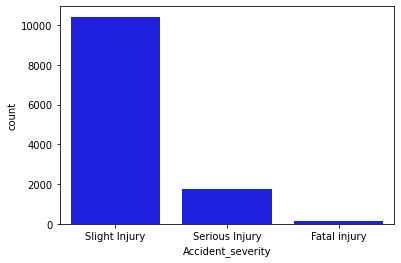

In [ ]:
#Count plot:
sns.countplot(x=y,color='blue')

In [ ]:
#Here in y: one value is higher compared to other:
#OVER SAMPLING:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)


In [ ]:
#check versampling o/p:
y1=pd.DataFrame(yo)
y1.value_counts()

Accident_severity
Fatal injury         10415
Serious Injury       10415
Slight Injury        10415
dtype: int64

**DATA SPLITTING:**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xo,yo,test_size=0.30,random_state=42) 
x_train
x_test
y_train
y_test

29518    Serious Injury
10388     Slight Injury
8426      Slight Injury
16296      Fatal injury
27990    Serious Injury
              ...      
31135    Serious Injury
15063      Fatal injury
12917      Fatal injury
30794    Serious Injury
7834      Slight Injury
Name: Accident_severity, Length: 9374, dtype: object

**MODEL CREATION:**

In [ ]:
#1.KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)                            
y_pred=knn.predict(x_test)                          
y_pred
#Performance check:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
mat=confusion_matrix(y_pred,y_test)
mat
#Accuracy score:
knnscore=accuracy_score(y_pred,y_test)
knnscore
#Classification report:
report=classification_report(y_pred,y_test)
print(report)

                precision    recall  f1-score   support

  Fatal injury       1.00      0.76      0.87      4086
Serious Injury       0.88      0.63      0.73      4411
 Slight Injury       0.27      0.97      0.43       877

      accuracy                           0.72      9374
     macro avg       0.72      0.79      0.67      9374
  weighted avg       0.87      0.72      0.76      9374



In [ ]:
#2.Naive_bayes

from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()                               
model.fit(x_train,y_train)                        
y_pred=model.predict(x_test)                      
print(y_pred)
#Performance check:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
mat=confusion_matrix(y_pred,y_test)
mat
#Accuracy score:
nvscore=accuracy_score(y_pred,y_test)
nvscore
#Classification report:
report=classification_report(y_pred,y_test)
print(report)

['Slight Injury' 'Serious Injury' 'Serious Injury' ... 'Fatal injury'
 'Slight Injury' 'Slight Injury']
                precision    recall  f1-score   support

  Fatal injury       0.73      0.71      0.72      3217
Serious Injury       0.52      0.51      0.52      3180
 Slight Injury       0.67      0.70      0.68      2977

      accuracy                           0.64      9374
     macro avg       0.64      0.64      0.64      9374
  weighted avg       0.64      0.64      0.64      9374



In [ ]:
#3.SVM

from sklearn.svm import SVC
model=SVC()                                      
model.fit(x_train,y_train)                      
y_pred=model.predict(x_test)                     
print(y_pred)
#Performance check:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
mat=confusion_matrix(y_pred,y_test)
mat
#Accuracy score:
svmscore=accuracy_score(y_pred,y_test)
svmscore
#Classification report:
report=classification_report(y_pred,y_test)
print(report)

['Serious Injury' 'Slight Injury' 'Serious Injury' ... 'Fatal injury'
 'Serious Injury' 'Slight Injury']
                precision    recall  f1-score   support

  Fatal injury       0.95      0.92      0.94      3249
Serious Injury       0.74      0.87      0.80      2669
 Slight Injury       0.92      0.82      0.87      3456

      accuracy                           0.87      9374
     macro avg       0.87      0.87      0.87      9374
  weighted avg       0.88      0.87      0.87      9374



In [ ]:
#4.Decision tree:

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy') 
model.fit(x_train,y_train)                        
y_pred=model.predict(x_test)                      
print(y_pred)
#Performance check:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
mat=confusion_matrix(y_pred,y_test)
mat
#Accuracy score:
dtscore=accuracy_score(y_pred,y_test)
dtscore
#Classification report:
report=classification_report(y_pred,y_test)
print(report)

['Serious Injury' 'Slight Injury' 'Slight Injury' ... 'Fatal injury'
 'Slight Injury' 'Slight Injury']
                precision    recall  f1-score   support

  Fatal injury       0.99      0.95      0.97      3261
Serious Injury       0.85      0.77      0.81      3459
 Slight Injury       0.72      0.84      0.77      2654

      accuracy                           0.85      9374
     macro avg       0.85      0.85      0.85      9374
  weighted avg       0.86      0.85      0.86      9374



In [ ]:
#5.Randonm forest:

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()                    
model.fit(x_train,y_train)                        
y_pred=model.predict(x_test)                     
print(y_pred)
#Performance check:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
mat=confusion_matrix(y_pred,y_test)
mat
#Accuracy score:
rfscore=accuracy_score(y_pred,y_test)
rfscore
#Classification report:
report=classification_report(y_pred,y_test)
print(report)

['Serious Injury' 'Slight Injury' 'Slight Injury' ... 'Fatal injury'
 'Serious Injury' 'Slight Injury']
                precision    recall  f1-score   support

  Fatal injury       0.99      0.99      0.99      3137
Serious Injury       0.90      0.87      0.89      3244
 Slight Injury       0.86      0.90      0.88      2993

      accuracy                           0.92      9374
     macro avg       0.92      0.92      0.92      9374
  weighted avg       0.92      0.92      0.92      9374



**COMPARING ACCURACY:**

In [ ]:
alg=["KNN","Naive-bayes","SVM","Decision tree","Random forest"]
acc=[knnscore,nvscore,svmscore,dtscore,rfscore]
Accuracy_scores=pd.DataFrame({'Algorithms':alg,'Accuracy':acc})
Accuracy_scores['Accuracy']=Accuracy_scores['Accuracy']*100
Accuracy_scores

,Algorithms,Accuracy
0,KNN,71.847664
1,Naive-bayes,63.846810
2,SVM,86.953275
3,Decision tree,85.374440
4,Random forest,91.945808


In [ ]:

Accuracy_scores.sort_values(by='Accuracy',ascending=False)

,Algorithms,Accuracy
4,Random forest,91.945808
2,SVM,86.953275
3,Decision tree,85.374440
0,KNN,71.847664
1,Naive-bayes,63.846810


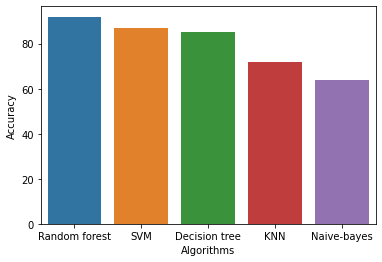

In [ ]:
ax=sns.barplot(x="Algorithms",y="Accuracy",data=Accuracy_scores.sort_values(by='Accuracy',ascending=False))

**CONCLUSION:**


*   Random forest:=>Highest Accuracy

*   Naive_bayes:=>Lowest Accuracy





